In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

In [7]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

In [9]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1, inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

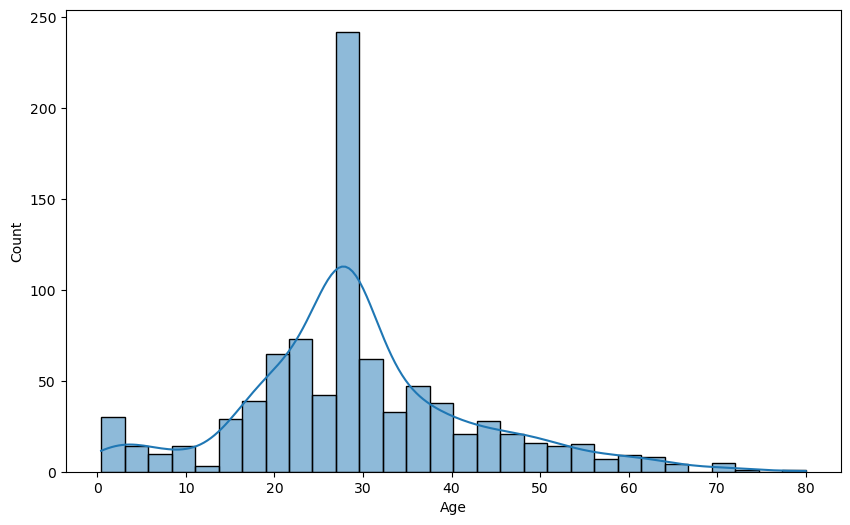

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)

<Axes: xlabel='Survived', ylabel='count'>

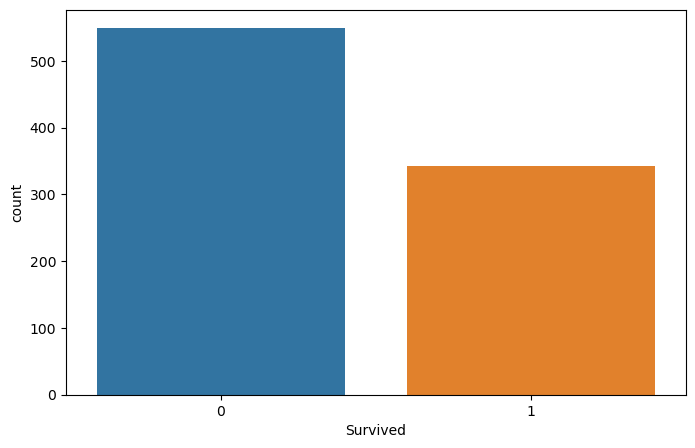

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data=df)

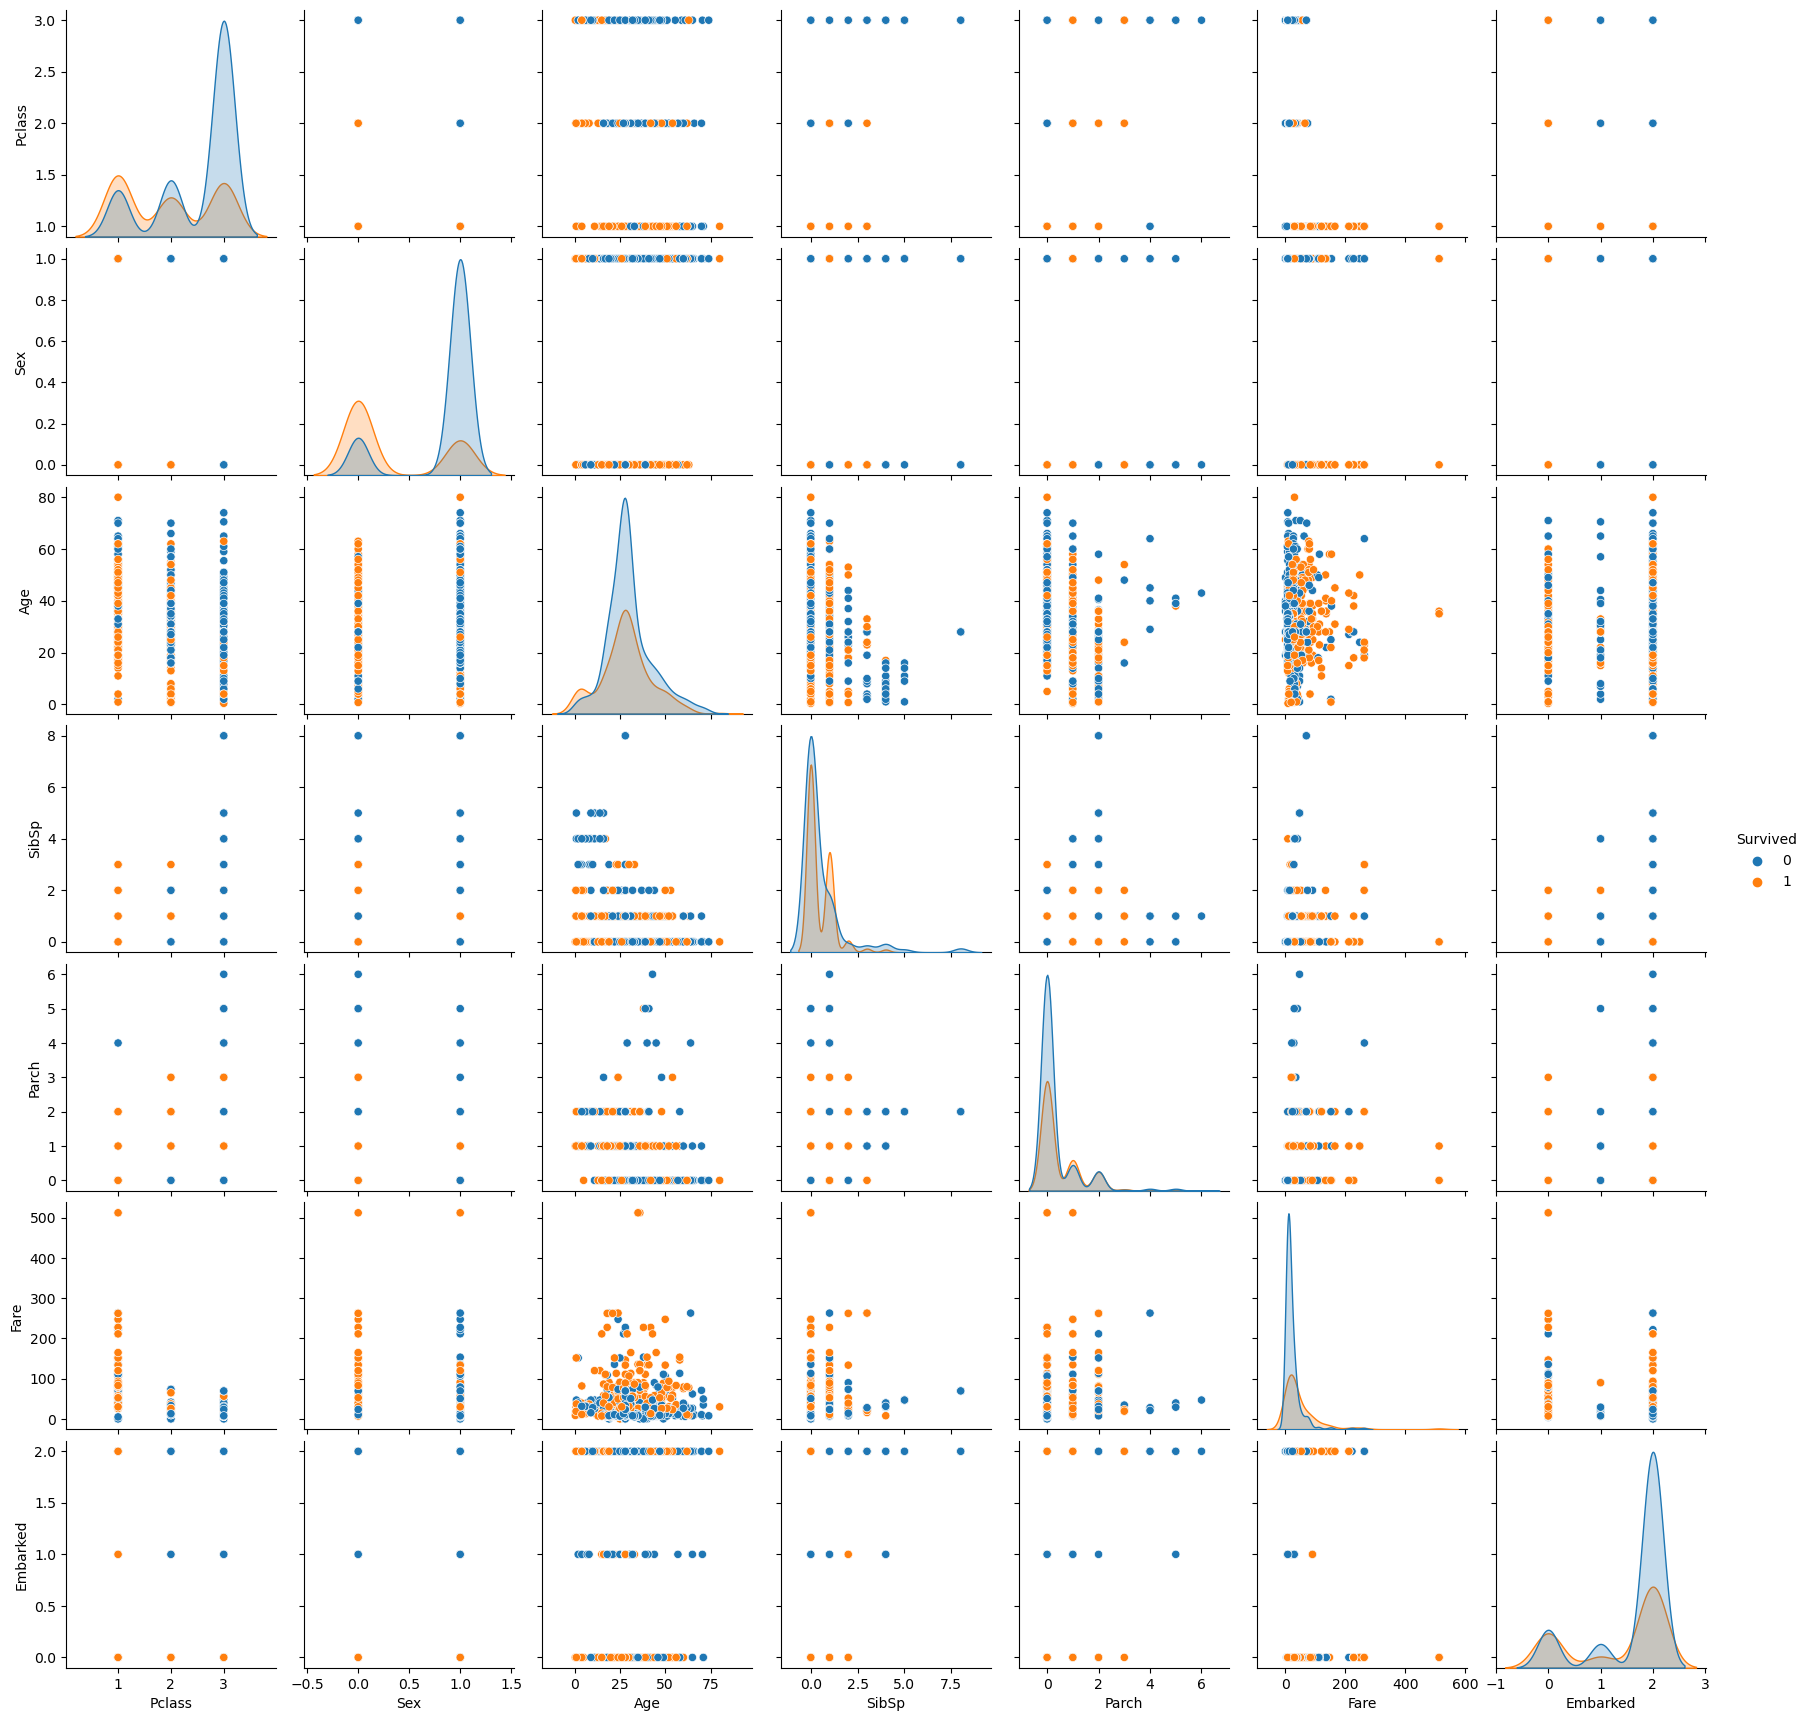

In [12]:
sns.pairplot(df,hue='Survived')
plt.show()

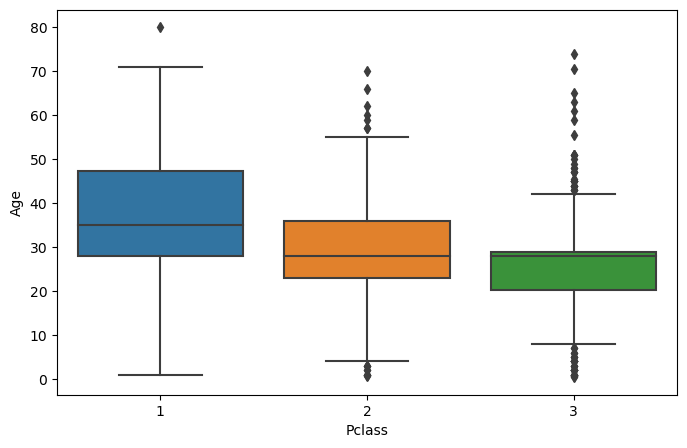

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.show()

<Axes: >

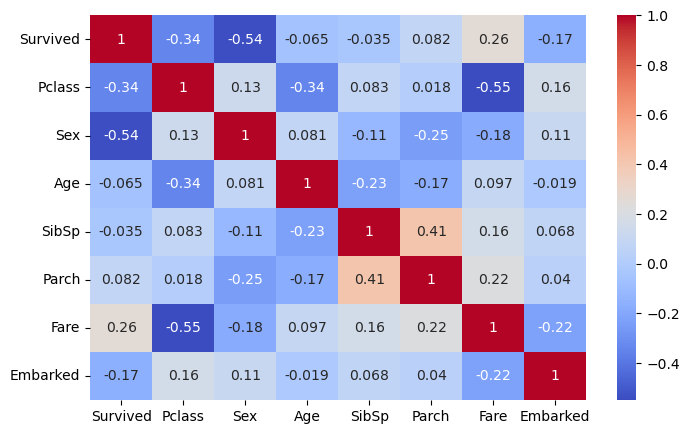

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [15]:
df['FamilySize'] = df['SibSp'] + df['Parch'] +1

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, random_state=42)

In [19]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('rf',rf),('gb',gb),('svm',svm)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42))],
                 voting='soft')

In [20]:
y_pred = voting_clf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy: ", accuracy_score(y_test, y_pred))
print('Classification Report:\n ',classification_report(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.8268156424581006
Classification Report:
                precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179

Confusion Matrix:
 [[94 11]
 [20 54]]
